In [14]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import cv2
%matplotlib inline

In [24]:
def erode_image(img, erosion_factor):
    kernel = np.ones((erosion_factor, erosion_factor), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def generate_goals(img, step, offset_x=0, offset_y=0):
    height, width = img.shape
    goals = set()
    for y in range(step, height, step):
        for x in range(step, width, step):
            
            inner_y = y + offset_y
            inner_x = x + offset_x
            
            if inner_y < img.shape[0] and inner_x < img.shape[1] and img[inner_y][inner_x] > 250:
                goals.add((inner_x, inner_y))
                
    goals.add((33, 92))
    goals.add((13, 98))
    goals.add((45, 80))
    return goals

def draw_with_goals(img, goals):
    goal_img = img.copy()
    for p in goals:
        cv2.circle(goal_img, (p[0], p[1]), 2, (0, 255, 0), -1)
    plt.imshow(goal_img, cmap='gray')

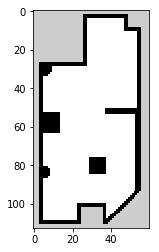

In [25]:
img = cv2.imread('../maps/bigMap.pgm', 0)
plt.imshow(img, cmap='gray')

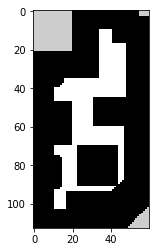

In [26]:
eroded = erode_image(img, 13)
plt.imshow(eroded, cmap='gray')

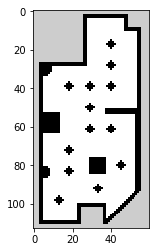

In [27]:
goals = generate_goals(eroded, 11, offset_x=7, offset_y=-5)
draw_with_goals(img, goals)